
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
# <p style="text-align: center;">Won Lee, Sam Malcolm</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, September 18 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer




While neither of us have experienced any of these directly, they did remind us of something that a former colleague of Sam's shared. He is now the Director of Analytics at a growing local business, and his story seemed to map onto the 8th challenge - "Solve a few good problems, but not solving enough problems at once."

When he first started at his company, he had a very small team. I believe it was just him and one other person. They had a very unsophisticated way of managing projects. People would submit requests, and it essentially turned into one long to-do list that they would work through in order. I got the impression that they were swamped.

With many smaller organizations just beginning to embrace data science, it's easy to see how this could happen elsewhere. If you are successful in one data science project, you have the capacity to impress other coworkers, and your queue of project requests can rapidly grow.

Eventually, they were able to grow their team out and improve their workflow in a very interesting way. They were able to hire some specialists - one person particulary good at predictive modeling, one person who was a great storyteller and "salesman", etc. In terms of process, they were able to standardize it and incorporate more machine learning and predictive methods that they had previously been unable to employ.

# Question 2: Maximum likelihood estimate (10 pts)

Prove the statement on slide 3 of notes on MLR:
"Then minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model."


## Answer

Note: We used RSS (SSE) since the 1/n from MSE gets dropped anyway. Minimizing MSE And SSE is similar, because deriving either will result in the same end. We decided to go with SSE for simplicity's sake.

<img src = "https://imgur.com/9uiKzYh.png">

# Question 3: Collinearity Issues (5 pts)

What is the “collinearity” issue encountered in MLR? Why is this a problem when you try to use MLR?
Suggest one way of addressing this problem.


## Answer

The "collinearity" issue encountered in MLR is when two or more of your X variables are correlated. 

With MLR, we seek to relate the variation in Y to the variation in X (with all other X's fixed). If X's are correlated, it makes it difficult to distinguish the affect of each / any on changes in Y.

This manifests itself in MLR through Coefficient Standard Errors. If there is high collinearity, it will inflate the standard errors for the intercept and coefficient. It's easy to find similar models to the OLS model. Hypothetically, with perfect collinearity, the confidence interval can be infinite.

This is why it isn't always beneficial to focus exclusively on Mean Squared Error (or similar metrics) when evaluating MLR models. Adding an extra variable could decrease your MSE, but if correlated with other variables, could increase your uncertainty with the model.

The simplest way to address this is by removing one of the correlated variables. A more nuanced way might be to use Principle Components Analysis to combine the affect of these variables into one weight.

# Question 4: Multiple Linear Regression in Python (20 pts)

Use the following code to import the allstate-claims-severity dataset and linear models in python. The dataset is taken from https://www.kaggle.com/c/allstate-claims-severity I have removed the categorical variables to make it easier to run the models. Because of this, MAE (Mean absolute error) will be on higher end compared to other Kaggle entries. Please donwload the dataset "reduced_train.csv" and use it.



In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv("reduced_train.csv")

X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. The code for this is given below. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

## Answer

### A.

In [3]:
X.shape

(188318, 14)

In [4]:
X[:5]

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


### B.

In [5]:
# Create and fit model
reg = linear_model.LinearRegression()
model = reg.fit(X, Y)

# Print coefficients
pd.DataFrame(model.coef_)

,0
0,-2137.111212
1,1762.240616
2,-56.579685
3,-301.172981
4,30.032018
5,-557.225099
6,1707.955206
7,298.612406
8,2049.379104
9,-250.019861


In [6]:
pred = model.predict(X)

print "The MAE is: " + str(mean_absolute_error(Y, pred))

The MAE is: 1950.3606265639835


In [7]:
Y.describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

### C.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

In [9]:
# Create and fit training model
reg_train = linear_model.LinearRegression()
model_train = reg_train.fit(X_train, Y_train)

# Evaluate the training set
pred_train = model_train.predict(X_train)

print "The Train MAE is: " + str(mean_absolute_error(Y_train, pred_train))

# Evaluate the test set
pred_test = model_train.predict(X_test)

print "The Test MAE is: " + str(mean_absolute_error(Y_test, pred_test))

The Train MAE is: 1946.9866773014621
The Test MAE is: 1954.111059596165


We observe a slightly higher MAE when predicting the Test data than the Train data. This makes sense. Since we fit the model to the training data, it should more closely match those data points. On the other hand, the test data are data points that we did not interact with or fit into our model, thus resulting in a higher MAE when we tested our model against it. Overall, though, they are quite similar.

### D.

(array([1.29622e+05, 2.07200e+03, 1.05000e+02, 1.20000e+01, 6.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([6.70000000e-01, 1.21018280e+04, 2.42029860e+04, 3.63041440e+04,
        4.84053020e+04, 6.05064600e+04, 7.26076180e+04, 8.47087760e+04,
        9.68099340e+04, 1.08911092e+05, 1.21012250e+05]),
 <a list of 10 Patch objects>)

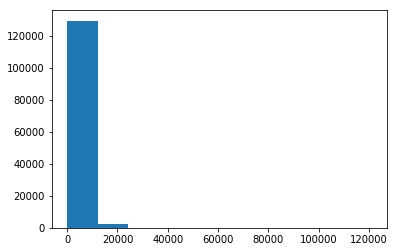

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Histogram of Y_train
plt.hist(Y_train)

(array([1.0000e+00, 1.0000e+00, 3.0000e+00, 2.7000e+01, 3.8200e+02,
        2.1235e+04, 6.8083e+04, 3.8823e+04, 3.2420e+03, 2.5000e+01]),
 array([-0.40047757,  0.8099349 ,  2.02034736,  3.23075982,  4.44117228,
         5.65158475,  6.86199721,  8.07240967,  9.28282213, 10.4932346 ,
        11.70364706]),
 <a list of 10 Patch objects>)

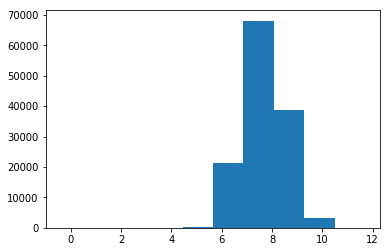

In [11]:
# Log transform Y_train, plot histogram
Y_train_log = np.log(Y_train)
plt.hist(Y_train_log)

In [12]:
# Log transform Y_test
Y_test_log = np.log(Y_test)

# Create and fit training model
reg_train2 = linear_model.LinearRegression()
model_train2 = reg_train2.fit(X_train, Y_train_log)

# Evaluate the training set, bring back to unit scale
pred_train2 = model_train2.predict(X_train)
pred_train_scale = np.exp(pred_train2)

print "The new Train MAE is: " + str(mean_absolute_error(Y_train, pred_train_scale))

# Evaluate the test set, bring back to unit scale
pred_test2 = model_train2.predict(X_test)
pred_test_scale = np.exp(pred_test2)

print "The new Test MAE is: " + str(mean_absolute_error(Y_test, pred_test_scale))

The new Train MAE is: 1797.4369165421042
The new Test MAE is: 1810.6519682594767


In [13]:
Y_train.describe()

count    131822.000000
mean       3032.154402
std        2915.817731
min           0.670000
25%        1204.510000
50%        2110.045000
75%        3859.160000
max      121012.250000
Name: loss, dtype: float64

Previously, outliers were significantly affecting the model. You can observe this by the right-skewed distribution of Y_train values in our first plot. At least one value is greater than 120,000 despite most (75%) of the observations being less than 4,000. 

Fitting the model against log-normalized values helps to reduce the affect of outliers resulted in much lower MAE values in both train and test data, indicating that this new model does a better job of predicting the output. 

# Question 5: Ridge and Lasso Regression (25 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. Take log of the Y_train and use it for training.

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

## Answer

### 1.

##### Lasso

In [14]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=50)
alphas =  10**np.linspace(10,-6,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring = 'neg_mean_absolute_error')
clf.fit(X_train, Y_train_log)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

(5000000000.0, 5e-07)

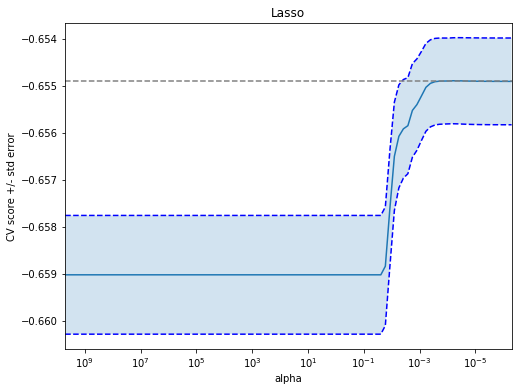

In [15]:
# Plotting results
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.title('Lasso')
plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [16]:
print "Best lambda: ", clf.best_params_

Best lambda:  {'alpha': 6.309284415330092e-05}


##### Ridge

In [17]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=50)
alphas =  10**np.linspace(10,-6,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

crf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring = 'neg_mean_absolute_error')
crf.fit(X_train, Y_train_log)
scores = crf.cv_results_['mean_test_score']
scores_std = crf.cv_results_['std_test_score']

(5000000000.0, 5e-07)

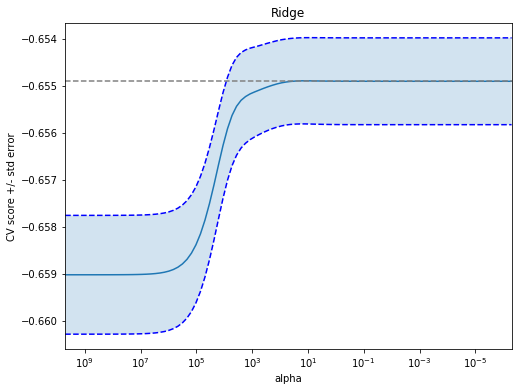

In [18]:
# Plotting results
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.title('Ridge')
plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [19]:
print "Best alpha: ", crf.best_params_

Best alpha:  {'alpha': 13.5929412136647}


### 2.

In [20]:
# Run Lasso
coefs_lasso = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, Y_train_log)
    coefs_lasso.append(lasso.coef_)

Text(0.5,1,'Lasso coefficients as a function of the regularization')

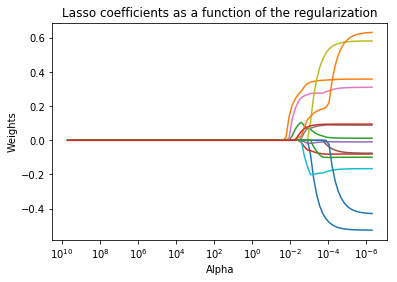

In [21]:
# Plot lasso
ax = plt.gca()
    
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # Reverse axis
ax.set_xlabel('Alpha')
ax.set_ylabel('Weights')
ax.set_title('Lasso coefficients as a function of the regularization')

In [22]:
# Run Ridge
coefs_ridge = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, Y_train_log)
    coefs_ridge.append(ridge.coef_)

Text(0.5,1,'Ridge coefficients as a function of the regularization')

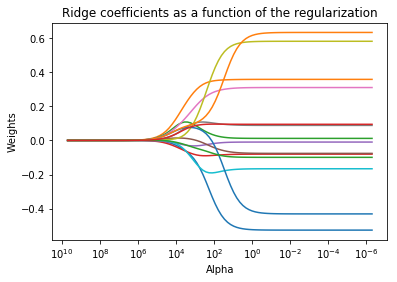

In [23]:
# Plot Ridge
ax = plt.gca()    
    
ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # Reverse axis
ax.set_xlabel('Alpha')
ax.set_ylabel('Weights')
ax.set_title('Ridge coefficients as a function of the regularization')

As the value of the regularization parameter decreases, the weights of the factors increase. Conversely, as the regularization parameter increases, the weights of the factors decrease. This is why it is described as a "penalty" factor. By increasing the parameter, you decrease the contribution of certain factor weights. With Ridge, some of these weights can get very close to 0. With Lasso, some of these weights can equal zero, cancelling the contribution of a factor out completely.

### 3.

##### 1. Least Squares Regression

In [24]:
# Create and fit training model
reg_train2 = linear_model.LinearRegression()
model_train2 = reg_train2.fit(X_train, Y_train_log)

# Evaluate the test set, bring back to unit scale
pred_test2 = model_train2.predict(X_test)
pred_test_scale = np.exp(pred_test2)

print "Least Squares Regression MAE: " + str(mean_absolute_error(Y_test, pred_test_scale))

Least Squares Regression MAE: 1810.6519682594767


##### 2. Lasso

In [25]:
# Create and fit training model
lasso_alpha = clf.fit(X_train, Y_train_log).best_estimator_.alpha
lasso = linear_model.Lasso(random_state = 50, alpha = lasso_alpha)
lasso_fit = lasso.fit(X_train, Y_train_log)

# Evaluate the test set, bring back to unit scale
lasso_pred = lasso_fit.predict(X_test)
lasso_pred_scale = np.exp(lasso_pred)

print "Lasso MAE: " + str(mean_absolute_error(Y_test, lasso_pred_scale))

Lasso MAE: 1810.6424216634994


##### 3. Ridge

In [26]:
# Create and fit training model
ridge_alpha = crf.fit(X_train, Y_train_log).best_estimator_.alpha
ridge = Ridge(random_state = 50, alpha = ridge_alpha)
ridge_fit = lasso.fit(X_train, Y_train_log)

# Evaluate the test set, bring back to unit scale
ridge_pred = ridge_fit.predict(X_test)
ridge_pred_scale = np.exp(ridge_pred)

print "Ridge MAE: " + str(mean_absolute_error(Y_test, ridge_pred_scale))

Ridge MAE: 1810.6424216634994


### 4.

In [27]:
clf2 = linear_model.LassoCV(alphas=None, cv=10, max_iter=10000)
clf2.fit(X_train, Y_train_log)
lasso_alpha = clf2.alpha_
print "The best lambda value is: " + str(lasso_alpha)
print "\n"
lasso2 = Lasso(random_state = 50, alpha = lasso_alpha)
lasso2_fit = lasso2.fit(X_train, Y_train_log)
print "Lasso coefficients: " 
pd.DataFrame(lasso2_fit.coef_)

The best lambda value is: 1.742378003185893e-05


Lasso coefficients: 


,0
0,-0.517112
1,0.356932
2,0.012615
3,-0.080685
4,-0.009504
5,-0.068813
6,0.306097
7,0.088403
8,0.572165
9,-0.168691


In [28]:
lasso_pred2 = clf2.predict(X_test)
lasso_pred_scale2 = np.exp(lasso_pred2)

print "Lasso MAE: " + str(mean_absolute_error(Y_test, lasso_pred_scale2))

Lasso MAE: 1810.6363540763562


# Question 6 (10pts)

Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.

## Answer

<img src = "https://imgur.com/WSa8UTf.png">

#### A. Data-dependent Noise Variance

If we assume that the residual has a proportional relationship with the noise where a reduction in noise results in a lower residual, we can assume that a faulty measurement device or a possible computational error in the model can result in the presence of a rn weighing factor in the sum of squared errors function. These errors will cause the noise in the data to be amplified, thereby increasing variance. As a result, the residual will increase by an amount reflected by the increased noise which will then reflect a representative amount in the sum of square error function. Accordingly, the sum of square error function will incorporate the weighing factor to represent the artificial rise in error caused by the increase in noise, until an adjustment is made either to the model or measurement device. Alternatively, we can assume that the regression is pulled towards the noise due to the presence of “noise clusters”. When compared to a noise-less data, points will show weight associated with their distance from the noise, causing the weight to become a function of distance from noise clusters and not just of variance.

#### B. Replicated Data Points

If we assume that some number of the data points are replicated twice in our data through human error, the resulting regression will overweigh the replicated data points, resulting in overfitting that skews the model to be biased or anchored around these particular points. The accumulation of errors resulting from the overweighed data points will cause the sum of square errors to increase. Consequently, the sum of square error function will incorporate the rn weighing factor into its equation to represent the artificial increase in error, however, it can be dropped if we eliminate the duplicates from the dataset.